In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os

### Importing given datasets

In [174]:
customer= pd.read_csv('Customer Acqusition.csv')
customer.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [176]:
spend=pd.read_csv('spend.csv')
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [178]:
repay=pd.read_csv('Repayment.csv')
repay.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [180]:
# Removing unnecessary columns

repay.drop(['Unnamed: 4', 'SL No:'], axis=1 , inplace=True)

In [182]:
repay.head()

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02
2,A1,15-Jan-04,259490.06
3,A1,25-Jan-04,437555.12
4,A1,17-Jan-05,165972.88


### checking duplicates

In [184]:
customer.isnull().sum()

No          0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [186]:
spend.isnull().sum()

Sl No:      0
Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [11]:
repay.isnull().sum()

Customer    23
Month       23
Amount      23
dtype: int64

In [188]:
repay.dropna(inplace=True)
repay.isnull().sum()

Customer    0
Month       0
Amount      0
dtype: int64

### 1. In the above dataset,
### a. In case age is less than 18, replace it with mean of age values

In [192]:
customer.loc[customer['Age']< 18, 'Age'] = customer['Age'].mean()

In [194]:
customer['Age'].mean()

48.39940000000001

### (b) In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [196]:
# First join the tables

cust_limit = pd.merge(customer, spend, on='Customer', how='inner')

In [198]:
cust_limit.loc[(cust_limit['Amount'] > cust_limit['Limit']), 'Amount'] = (cust_limit['Limit']*50)/100

In [19]:
cust_limit.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07


### (c) Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [200]:
cust_repay=pd.merge(customer, repay, on='Customer', how='inner')

In [202]:
cust_repay.loc[(cust_repay['Amount'] > cust_repay['Limit']), 'Amount'] = cust_repay['Limit']

In [23]:
cust_repay.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,259490.06
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,437555.12
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,165972.88


### 2. From the above dataset create the following summaries:
###    a. How many distinct customers exist?

In [25]:
customer['Customer'].nunique()

100

### (b) How many distinct categories exist?

In [27]:
customer['Segment'].nunique()

5

### (c) What is the average monthly spend by customers?

In [29]:
spend.dtypes

Sl No:        int64
Customer     object
Month        object
Type         object
Amount      float64
dtype: object

In [208]:
#converting Month column of "spend" table to date time format
spend['Month'] = pd.to_datetime(spend['Month'])

In [210]:
spend['Year_Month'] = spend['Month'].dt.month
spend['Year'] = spend['Month'].dt.year

In [32]:
spend.head()

,Sl No:,Customer,Month,Type,Amount,Year_Month,Year
0,1,A1,2004-01-12,JEWELLERY,485470.80,1,2004
1,2,A1,2004-01-03,PETRO,410556.13,1,2004
2,3,A1,2004-01-15,CLOTHES,23740.46,1,2004
3,4,A1,2004-01-25,FOOD,484342.47,1,2004
4,5,A1,2005-01-17,CAMERA,369694.07,1,2005


In [212]:
monthly_avg = spend.groupby(['Year','Year_Month'])[['Amount']].mean()
monthly_avg

Amount
Year Year_Month               
2004 1           251712.068664
     2           221215.270000
     3           232146.119286
     4           235272.037143
     5           217539.236429
     9           310923.383571
     11          270486.397857
2005 1           292741.372857
     2           229802.279821
     4           252181.326429
     5           245696.515429
     6           262688.112857
     7           229116.663571
     8           233734.634286
     9           188666.202143
     10          194568.640714
     11          286143.322857
     12          147503.060000
2006 1           282058.006429
     2           253858.260714
     3           247166.084654
     4           232468.967553
     5           236162.740357
     6           177252.386429
     7           287505.098929
     8           240699.717143
     9           158520.090714
     10          236136.335000
     11          182841.290000
     12          270470.980714

### (d) What is the average monthly repayment by customers?

In [216]:
#converting Month column of "spend" table to date time format
repay['Month'] = pd.to_datetime(repay['Month'])

In [218]:
repay['Year_Month'] = repay['Month'].dt.month
repay['Year'] = repay['Month'].dt.year

In [37]:
repay.head()

,Customer,Month,Amount,Year_Month,Year
0,A1,2004-01-12,495414.75,1,2004
1,A1,2004-01-03,245899.02,1,2004
2,A1,2004-01-15,259490.06,1,2004
3,A1,2004-01-25,437555.12,1,2004
4,A1,2005-01-17,165972.88,1,2005


In [220]:
monthly_repay = repay.groupby(['Year','Year_Month'])[['Amount']].mean()
monthly_repay

Amount
Year Year_Month               
2004 1           243489.649786
     2           256702.630741
     3           252585.280667
     4           259141.679000
     5           226162.720800
     9           184487.848750
     11          209592.238000
2005 1           240548.098148
     2           238829.265123
     4           212688.631333
     5           263207.367857
     6           210199.818333
     7           239871.479167
     8           264430.921622
     9           247700.170000
     10          219849.956667
     11          256695.120000
     12          320379.335833
2006 1           293475.389167
     2           284489.565128
     3           240851.266814
     4           275472.251889
     5           256920.884943
     6           251990.453333
     7           257936.383243
     8           224143.992500
     9           262533.880833
     10          260765.480000
     11          199399.197407
     12          252736.569167

###  e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 
### (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts

In [222]:
#merging all the three tables

df = pd.merge(left=cust_limit,right=repay,on="Customer",how="inner")
df.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Amount_x,Month_y,Amount_y,Year_Month,Year
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,2004-01-12,495414.75,1,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,2004-01-03,245899.02,1,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,2004-01-15,259490.06,1,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,2004-01-25,437555.12,1,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,2005-01-17,165972.88,1,2005


In [224]:
# renaming the columns for clearity
df.rename(columns={"Amount_x":"Spend_Amount","Amount_y":"Repay_Amount"},inplace=True)

In [226]:
# grouping the data based on "Yearly","Month_x" columns to get the 'Spend_Amount'and 'Repay_Amount'
interest = df.groupby(["Year","Year_Month"])[['Spend_Amount','Repay_Amount']].sum()
interest

Spend_Amount  Repay_Amount
Year Year_Month                            
2004 1           1.088357e+09  1.699210e+09
     2           7.613922e+07  1.602419e+08
     3           5.594171e+07  8.974470e+07
     4           1.194516e+08  2.285403e+08
     5           8.800456e+07  1.411594e+08
     9           5.144278e+07  8.016122e+07
     11          5.504612e+07  7.860290e+07
2005 1           1.324129e+08  1.810333e+08
     2           5.890557e+08  9.416163e+08
     4           9.366405e+07  1.747894e+08
     5           7.149030e+08  1.099197e+09
     6           1.174019e+08  2.213774e+08
     7           3.995653e+07  7.997268e+07
     8           1.361400e+08  2.477449e+08
     9           3.195551e+07  7.530449e+07
     10          3.140993e+07  6.027830e+07
     11          1.532278e+08  2.763119e+08
     12          4.348638e+07  9.944533e+07
2006 1           5.127574e+07  8.974491e+07
     2           1.654843e+08  2.903280e+08
     3           7.393854e+08  1.115725e+09
     4           3.229722e+08  6.093666e+08
     5           3.297954e+08  5.434823e+08
     6           5.302118e+07  6.914431e+07
     7           1.444093e+08  2.245720e+08
     8           5.849630e+07  7.167032e+07
     9           5.395681e+07  8.083199e+07
     10          5.285823e+07  7.890924e+07
     11          1.124836e+08  1.355832e+08
     12          4.585222e+07  7.087702e+07

In [228]:
 # Monthly Profit = Monthly repayment – Monthly spend.
interest['Profit'] = interest['Repay_Amount'] - interest['Spend_Amount']

In [230]:
#interest of 2.9%
interest['Interest_Amount'] = (interest['Profit']* 2.9)/100

In [232]:
interest

Spend_Amount  Repay_Amount        Profit  Interest_Amount
Year Year_Month                                                           
2004 1           1.088357e+09  1.699210e+09  6.108525e+08     1.771472e+07
     2           7.613922e+07  1.602419e+08  8.410268e+07     2.438978e+06
     3           5.594171e+07  8.974470e+07  3.380298e+07     9.802865e+05
     4           1.194516e+08  2.285403e+08  1.090887e+08     3.163572e+06
     5           8.800456e+07  1.411594e+08  5.315485e+07     1.541491e+06
     9           5.144278e+07  8.016122e+07  2.871844e+07     8.328349e+05
     11          5.504612e+07  7.860290e+07  2.355678e+07     6.831466e+05
2005 1           1.324129e+08  1.810333e+08  4.862042e+07     1.409992e+06
     2           5.890557e+08  9.416163e+08  3.525606e+08     1.022426e+07
     4           9.366405e+07  1.747894e+08  8.112539e+07     2.352636e+06
     5           7.149030e+08  1.099197e+09  3.842944e+08     1.114454e+07
     6           1.174019e+08  2.213774e+08  1.039755e+08     3.015290e+06
     7           3.995653e+07  7.997268e+07  4.001615e+07     1.160468e+06
     8           1.361400e+08  2.477449e+08  1.116049e+08     3.236542e+06
     9           3.195551e+07  7.530449e+07  4.334898e+07     1.257121e+06
     10          3.140993e+07  6.027830e+07  2.886837e+07     8.371827e+05
     11          1.532278e+08  2.763119e+08  1.230841e+08     3.569438e+06
     12          4.348638e+07  9.944533e+07  5.595895e+07     1.622810e+06
2006 1           5.127574e+07  8.974491e+07  3.846917e+07     1.115606e+06
     2           1.654843e+08  2.903280e+08  1.248436e+08     3.620465e+06
     3           7.393854e+08  1.115725e+09  3.763400e+08     1.091386e+07
     4           3.229722e+08  6.093666e+08  2.863944e+08     8.305437e+06
     5           3.297954e+08  5.434823e+08  2.136869e+08     6.196920e+06
     6           5.302118e+07  6.914431e+07  1.612313e+07     4.675707e+05
     7           1.444093e+08  2.245720e+08  8.016271e+07     2.324719e+06
     8           5.849630e+07  7.167032e+07  1.317402e+07     3.820465e+05
     9           5.395681e+07  8.083199e+07  2.687518e+07     7.793803e+05
     10          5.285823e+07  7.890924e+07  2.605102e+07     7.554795e+05
     11          1.124836e+08  1.355832e+08  2.309955e+07     6.698869e+05
     12          4.585222e+07  7.087702e+07  2.502480e+07     7.257193e+05

### f. What are the top 5 product types?

In [234]:
# Top 5 product types with highest spent amount
# Using cust_limit table which is already created by joining 'customers' and 'spend'

cust_limit.groupby('Type')['Amount'].sum().sort_values(ascending=False)[:5]

Type
PETRO           28597384.98
CAMERA          27690738.44
FOOD            20519243.60
AIR TICKET      20155847.12
TRAIN TICKET    19995825.72
Name: Amount, dtype: float64

### g. Which city is having maximum spend?

In [236]:
cust_limit.groupby('City')['Amount'].sum().sort_values(ascending=False)[:1]

City
COCHIN    45963513.5
Name: Amount, dtype: float64

###  h. Which age group is spending more money?

In [238]:
cust_limit['Age_level'] = pd.cut(cust_limit['Age'], bins=[18,30,60,100], labels=['Youth', 'Adult', 'Senior'])

In [244]:
cust_limit

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age_level
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,Senior
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,Senior
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46,Senior
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47,Senior
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07,Senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66,Adult
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,5000.00,Adult
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,5000.50,Adult
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,5001.00,Adult


In [246]:
age_wise = cust_limit.groupby('Age_level')['Amount'].sum().sort_values(ascending=False)
age_wise

C:\Users\91630\AppData\Local\Temp\ipykernel_2960\2572167041.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_wise = cust_limit.groupby('Age_level')['Amount'].sum().sort_values(ascending=False)


Age_level
Adult     1.240806e+08
Youth     5.268990e+07
Senior    4.301063e+07
Name: Amount, dtype: float64

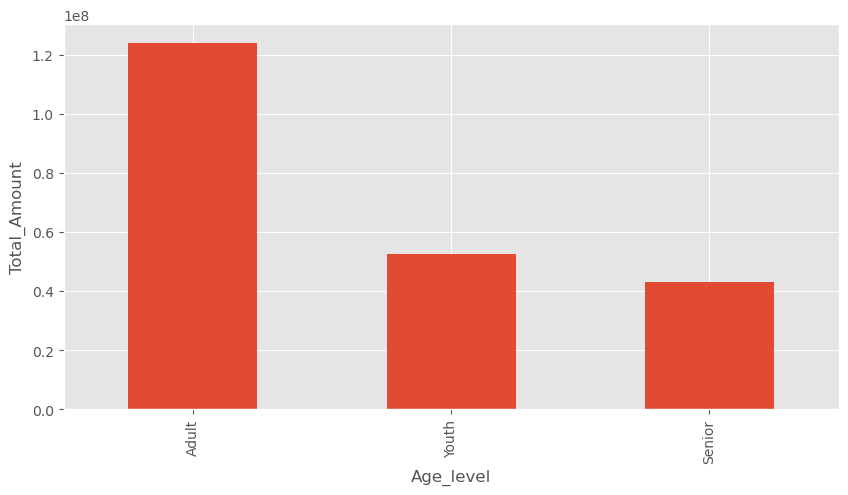

In [260]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
age_wise.plot(kind='bar',ylabel='Total_Amount')
plt.show();

### i. Who are the top 10 customers in terms of repayment?

In [265]:
cust_repay

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,259490.06
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,437555.12
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,165972.88
...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,100000.00
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,10000.00
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,10001.00
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,10002.00


In [271]:
cust_repay.groupby('Customer')['Amount'].sum().sort_values(ascending=False)[:10]

Customer
A61    10539142.91
A60     9876290.74
A13     9572000.66
A43     8489871.46
A45     8448334.87
A12     8334760.16
A14     7943268.63
A44     7744730.12
A39     7622483.30
A42     7615460.86
Name: Amount, dtype: float64

### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [288]:
#converting Month column of "spend" table to date time format
cust_limit['Month'] = pd.to_datetime(cust_limit['Month'])

In [333]:
# creating a Year column
cust_limit['Year'] = cust_limit['Month'].dt.year

In [292]:
cust_limit

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age_level,Year
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,Senior,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,Senior,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,Senior,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,Senior,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,Senior,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66,Adult,2004
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,AUTO,5000.00,Adult,2004
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,5000.50,Adult,2004
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,5001.00,Adult,2004


In [308]:
pivot = cust_limit.pivot_table(index=['City', 'Year'], columns='Product', values='Amount', aggfunc='sum')
pivot

Product                 Gold    Platimum      Silver
City       Year                                     
BANGALORE  2004   9289878.54  1112732.30  1291852.58
           2005  12892362.99   912284.97   830612.34
           2006  12030611.09   685831.27  1415480.94
BOMBAY     2004   6987853.53   897264.94   532089.03
           2005   8983018.28   711804.94   508988.54
           2006   7917144.31   972130.01  1092833.80
CALCUTTA   2004   7477140.98  2037690.30   500006.00
           2005  10303355.80  4434696.31   440147.06
           2006  11167532.77  3589606.66  1157956.42
CHENNAI    2004   1059618.50  3535652.38   282056.86
           2005   3740945.58  5053956.32   377184.49
           2006   2704288.62  5024923.40   350009.50
COCHIN     2004   7315850.15  3419904.07   814229.62
           2005  12110613.03  4960921.71   652269.38
           2006  10499142.38  4920592.29  1269990.87
DELHI      2004   2806495.00   283512.89   768172.30
           2005   1964845.27   494157.86   612311.21
           2006   2957103.32   176788.72   854899.97
PATNA      2004   2072567.90  1113069.60   756684.10
           2005   3252615.77  2883231.07   950094.19
           2006   2276181.69  1256137.65   700005.00
TRIVANDRUM 2004   2415102.84  2161676.67   209667.48
           2005   1240375.85  3601443.30   269912.99
           2006   2735710.87  2147403.75   555862.12

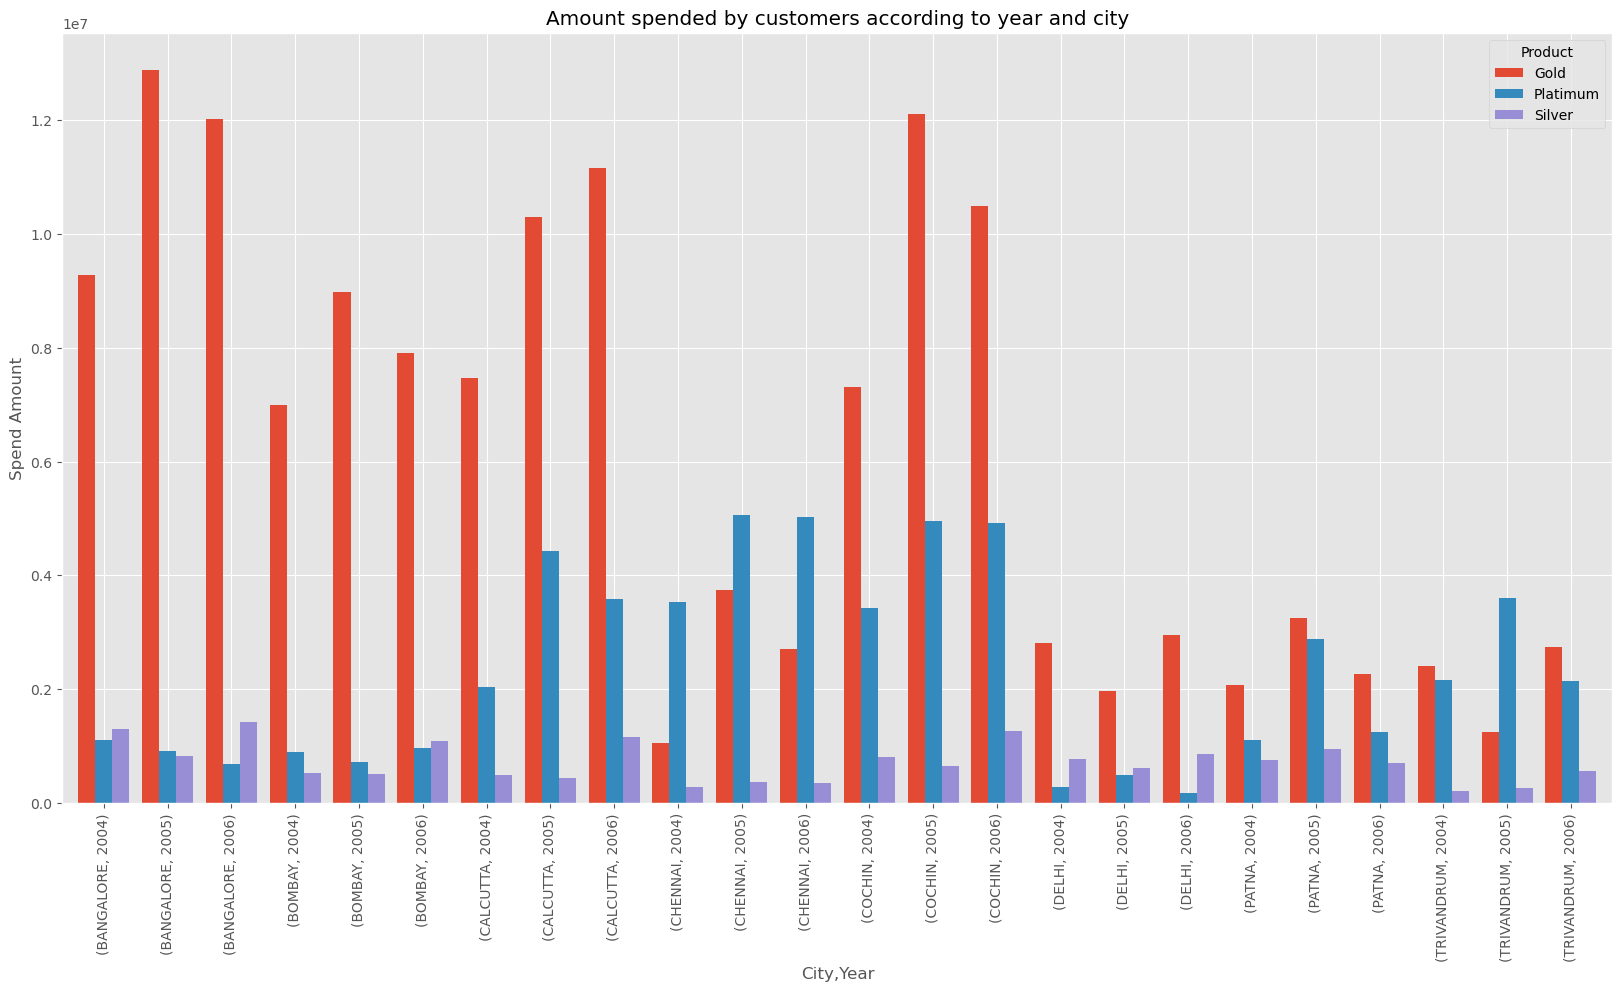

In [330]:
pivot.plot(kind="bar",figsize=(20,10),width=0.8)
plt.ylabel("Spend Amount")
plt.title("Amount spended by customers according to year and city")
plt.show()

### 4. Create graphs for
###    a. Monthly comparison of total spends, city wise

In [335]:
# creating a Month column

cust_limit['Year_Month'] = cust_limit['Month'].dt.month

In [337]:
cust_limit

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age_level,Year,Year_Month
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,Senior,2004,1
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,Senior,2004,1
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,Senior,2004,1
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,Senior,2004,1
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,Senior,2005,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66,Adult,2004,1
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,AUTO,5000.00,Adult,2004,1
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,5000.50,Adult,2004,1
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,5001.00,Adult,2004,1


In [341]:
Pivot_city_wise = cust_limit.pivot_table(index='Year_Month',columns='City',values='Amount', aggfunc='sum')
Pivot_city_wise

City,BANGALORE,BOMBAY,CALCUTTA,CHENNAI,COCHIN,DELHI,PATNA,TRIVANDRUM
Year_Month,,,,,,,,
1,9041796.84,5948993.33,9064864.90,4466961.36,11714373.54,2714261.45,4916205.55,3704336.99
2,6734494.76,4276988.30,8150545.61,4385815.95,5747886.38,1494064.06,2353333.55,2857123.89
3,5362903.07,5227850.50,4939040.04,3183643.71,5645146.53,2267149.02,1437166.61,2392316.51
4,4207980.48,1873785.01,3457507.95,2518656.99,3882744.94,777240.75,2338179.53,1199293.45
5,6383115.13,3891945.60,5578246.87,2856199.62,6581085.69,1600322.07,2136586.80,2813534.48
6,1330685.90,1172594.97,2293045.81,1244242.16,2495745.07,511276.09,746186.13,400336.83
7,2228217.69,177726.32,2234573.27,693825.77,1290897.30,50001.50,50000.00,260484.50
8,695061.95,1066744.75,1548354.02,305875.97,2317306.61,155402.16,419383.64,453773.94
9,703018.28,1278402.79,1511713.57,745759.40,1382242.90,50001.00,70329.95,186063.70


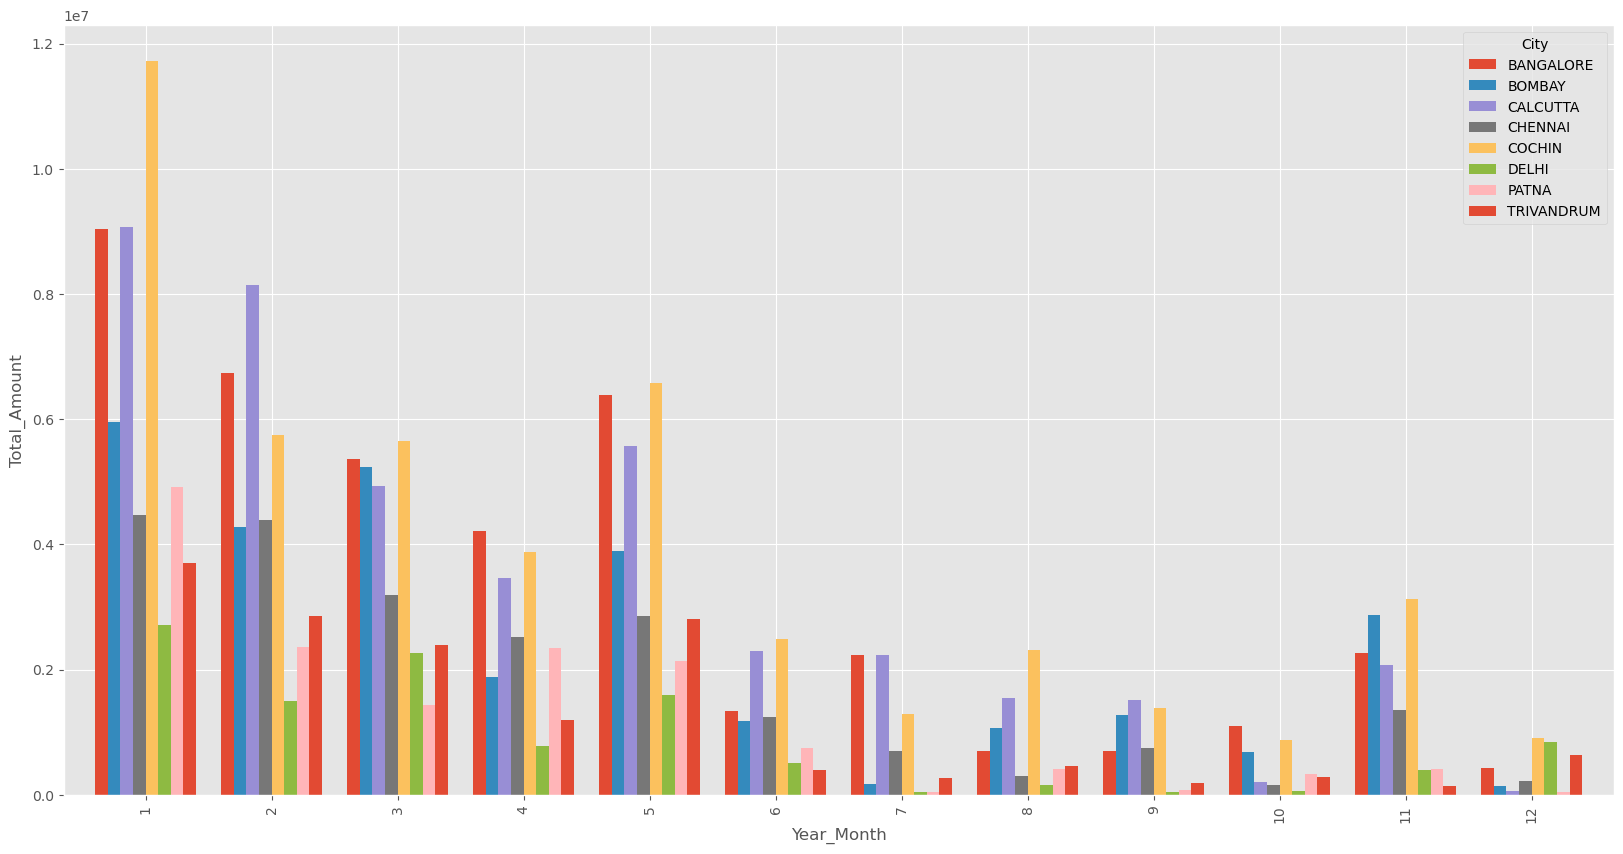

In [351]:
Pivot_city_wise.plot(kind='bar',figsize=(20,10), width=0.8, ylabel='Total_Amount')
plt.show()

### b. Comparison of yearly spend on air tickets

In [418]:
pivot_air_tickets = pd.pivot_table(data = cust_limit[cust_limit.Type=='AIR TICKET'], index = 'Type', columns='Year', values='Amount', aggfunc='sum').T
pivot_air_tickets

Type,AIR TICKET
Year,
2004,4357225.35
2005,10550152.21
2006,5248469.56


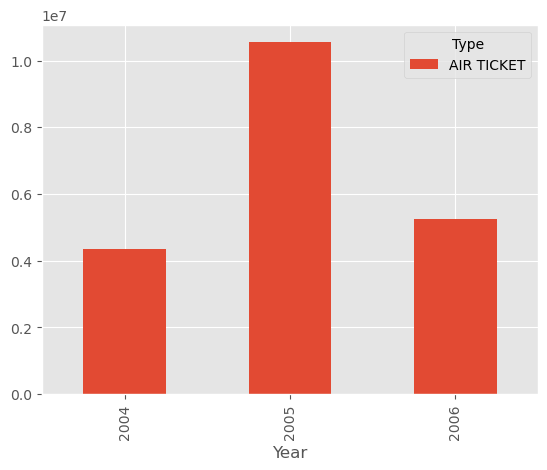

In [428]:
pivot_air_tickets.plot(kind='bar')
plt.show()

### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [435]:
product_wise = cust_limit.pivot_table(index='Product',columns='Year_Month',values='Amount',aggfunc='sum').T
product_wise

Product,Gold,Platimum,Silver
Year_Month,,,
1,32413831.83,14951578.51,4206383.62
2,24779179.55,9134054.58,2087018.37
3,19256972.48,7288837.68,3909405.83
4,13170572.59,5182493.86,1902322.65
5,21548169.76,8151926.49,2140940.01
6,6538862.64,2965712.71,689537.61
7,5167416.37,1288156.26,530153.72
8,4954030.42,1714762.80,293109.82
9,3816887.62,1667840.84,442803.13


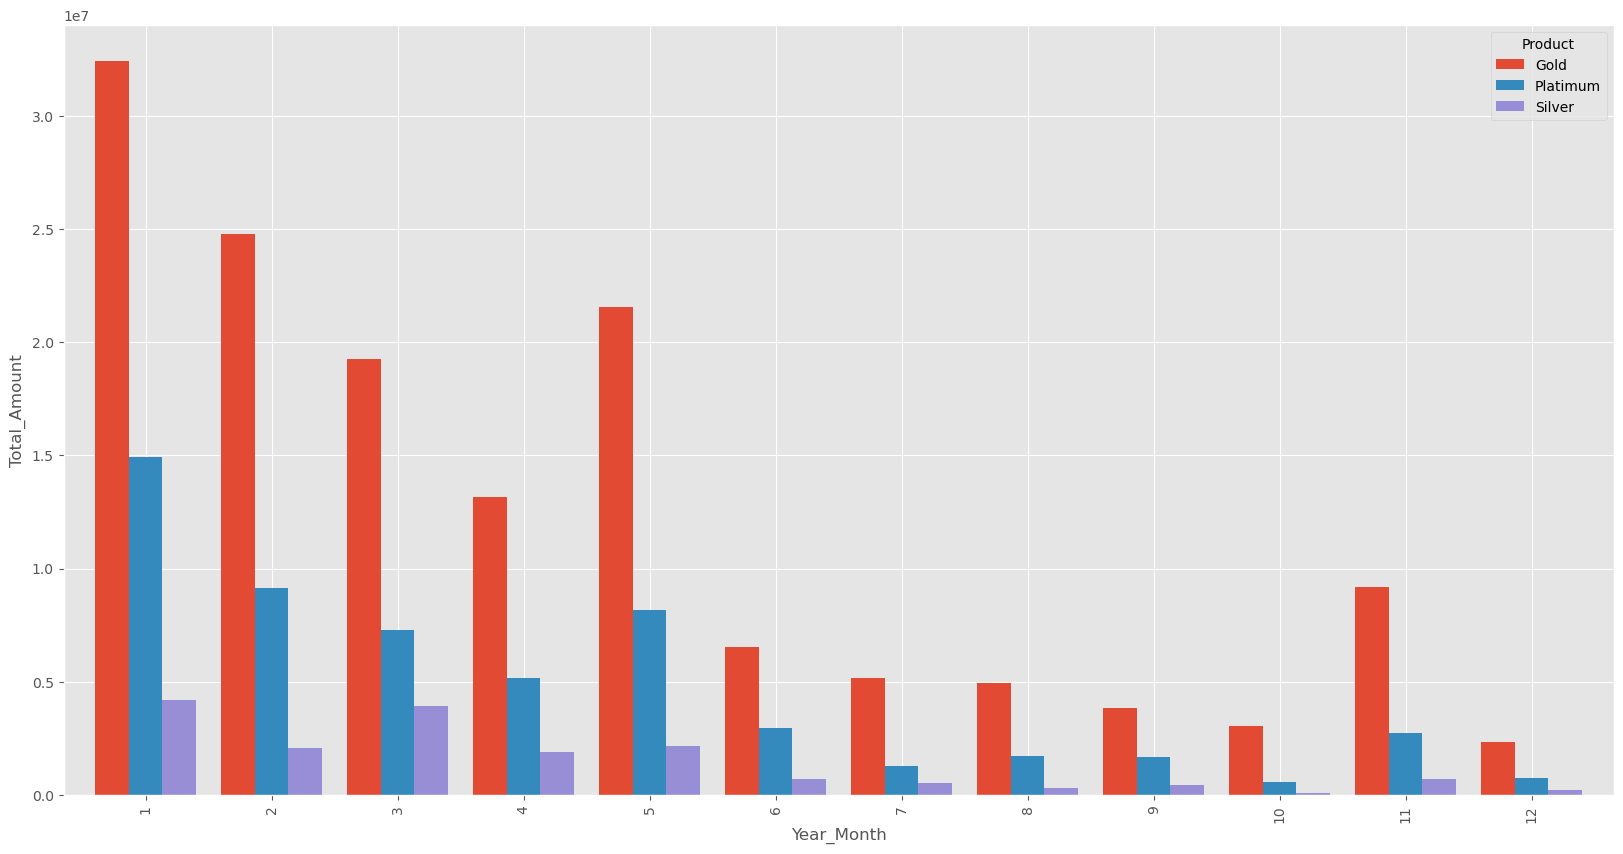

In [441]:
product_wise.plot(kind='bar',figsize=(20,10),width=0.8, ylabel='Total_Amount')
plt.show()

### The total spend for each product is gradually decreasing from January to December from the above graph.

### (5) Write user defined PYTHON function to perform the following analysis: You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [452]:
# converting Month column of "spend" table to date time format in cust_repay table

cust_repay['Month'] = pd.to_datetime(cust_repay['Month'])

In [454]:
# creating a Year and Month columns

cust_repay['Year'] = cust_repay['Month'].dt.year
cust_repay['Year_Month'] = cust_repay['Month'].dt.month

In [456]:
cust_repay.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount,Year,Year_Month
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,2004,1
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02,2004,1
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06,2004,1
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12,2004,1
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88,2005,1


In [503]:
def top10cust(product_category,time_period):
    return cust_repay.loc[(cust_repay['Product'] == product_category)].groupby(['Customer','City','Product',time_period])['Amount'].sum().reset_index().sort_values(by='Amount',ascending=False).head(10)

### One-way of Input 

In [477]:
product_category=str(input("Please enter the Product Category: "))
time_period=str(input("Please enter the Time Period: "))

Please enter the Product Category:  Gold
Please enter the Time Period:  Year_Month


In [479]:
top10cust(product_category,time_period)

,Customer,City,Product,Year_Month,Amount
176,A61,COCHIN,Gold,4,3412860.60
132,A42,BOMBAY,Gold,5,3305341.39
113,A30,BANGALORE,Gold,5,3086549.14
107,A29,CALCUTTA,Gold,5,2612139.63
128,A42,BOMBAY,Gold,1,2516249.24
163,A60,CALCUTTA,Gold,1,2465584.81
145,A44,DELHI,Gold,1,2415712.91
0,A1,BANGALORE,Gold,1,2407806.29
166,A60,CALCUTTA,Gold,4,2397565.91
100,A28,TRIVANDRUM,Gold,5,2233253.41


### Another way of input

In [513]:
top10cust(product_category='Silver',time_period='Year')

,Customer,City,Product,Year,Amount
14,A24,DELHI,Silver,2005,1184870.98
8,A22,BOMBAY,Silver,2005,1141542.81
20,A46,PATNA,Silver,2005,1116730.89
18,A25,COCHIN,Silver,2006,1000030.00
11,A23,BANGALORE,Silver,2005,1000010.00
22,A57,TRIVANDRUM,Silver,2004,1000010.00
7,A22,BOMBAY,Silver,2004,953419.47
9,A22,BOMBAY,Silver,2006,945271.83
12,A23,BANGALORE,Silver,2006,872925.32
21,A46,PATNA,Silver,2006,839228.07
